In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns
import pandas as pd

C:\Users\Mohsen\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [118]:
class MexicanHat:
    def __init__(self, r1, r2, c1=0.6, c2=-0.04, t_max=10):
        self.r1 = r1
        self.r2 = r2
        self.c1 = c1
        self.c2 = c2
        self.t_max = t_max
    
    def f(self, x):
        return np.clip(x, 0, 2)
    
    def __separate_neigbors(self, x, center_idx):
        pos_neighbors, neg_neighbors = [], []
        for i, value in enumerate(x):
            if center_idx - self.r1 <= i <= center_idx + self.r1:
                pos_neighbors.append(x[i])
            elif center_idx + self.r1 < i <= center_idx + self.r2:
                neg_neighbors.append(x[i])
            elif center_idx - self.r2 <= i < center_idx - self.r1:
                neg_neighbors.append(x[i])
        return pos_neighbors, neg_neighbors
        
    def iterate(self, inputs):
        x = np.array(inputs)
        for t in tqdm(range(self.t_max)):
            self.plot(x, t)
            x_old = x.copy()
            for idx in range(len(x)):
                pos_neighbors, neg_neighbors = self.__separate_neigbors(x_old, idx)
                x[idx] = self.c1 * (np.sum(pos_neighbors)) + self.c2 * (np.sum(neg_neighbors))
                x[idx] = self.f(x[idx])
        return np.argmax(x), inputs[np.argmax(x)]
                
    def plot(self, x, t):
        if t == 0:
            plt.figure(figsize=(15, 6))
#         plt.subplot(self.t_max // 4 + 1, 4, t + 1)
        plt.plot(range(len(x)), x, label=t, color=plt.get_cmap("tab20c")(t))
        plt.legend()

  0%|          | 0/10 [00:00<?, ?it/s]

(5, 0.77)

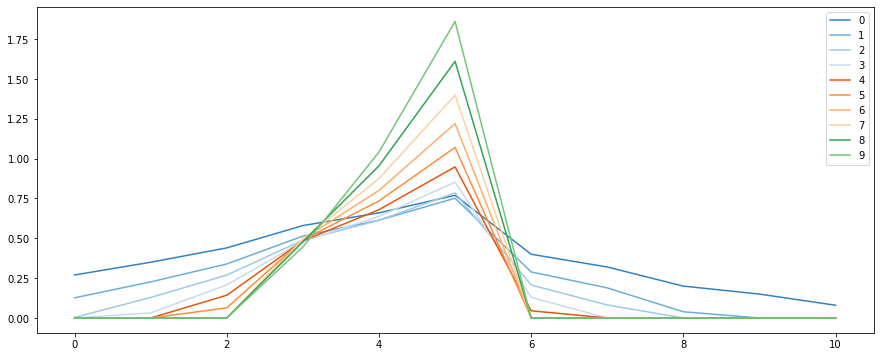

In [119]:
mexican_hat = MexicanHat(r1=0, r2=np.inf, c1=1.2, c2=-0.05)
mexican_hat.iterate([0.27, 0.35, 0.44, 0.58, 0.66, 0.77, 0.4, 0.32, 0.20, 0.15, 0.08])

  0%|          | 0/10 [00:00<?, ?it/s]

(4, 0.66)

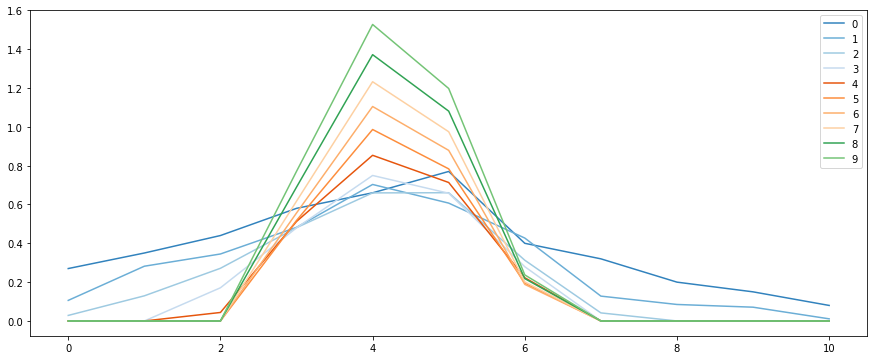

In [120]:
mexican_hat = MexicanHat(r1=1, r2=3, c1=0.5, c2=-0.2)
mexican_hat.iterate([0.27, 0.35, 0.44, 0.58, 0.66, 0.77, 0.4, 0.32, 0.20, 0.15, 0.08])